### 머신러닝 개념 
#### 선형회귀(Linear Regression) : 1차 함수, 직선의 방정식
- 가중치(Weight) : 입력변수가 출력에 영향을 미치는 정도를 설정
- 편향(Bias) : 기본 출력값이 활성화되는 정도를 설정

#### 비용함수(Cost Function)
- cost(비용) = 오차 = 에러 = 손실(loss)
- cost(W,b) = (H(x) - y)^2

#### 예측(가설 ,Hypothesis) 함수
- H(x) = WX + b
   
#### 경사하강법(Gradient Descent Alogorithm)
- 비용이 가장 작은 기울기값을 구하는 알고리즘

In [6]:
# 비용함수 구현
def cost(x,y,w) :
    c = 0
    for i in range(len(x)):
        hx = w * x[i]
        loss = (hx - y[i])**2
        c += loss        
    return c/(len(x))

x = [1,2,3]
y = [1,2,3]
# y = [2,4,6]
# y = [1,3,5]
print(cost(x,y,-1))
print(cost(x,y,0))
print(cost(x,y,1))        
print(cost(x,y,2))  
print(cost(x,y,3))  

import matplotlib.pyplot as plt
# 비용함수의 그래프 출력
# x축 : w (기울기)
# y축 : cost (비용)
for i in range(-30,50):
    w = i/10
    c = cost(x,y,w)
#     print(w,c)
    plt.plot(w,c,'ro')
plt.show()

18.666666666666668
4.666666666666667
0.0
4.666666666666667
18.666666666666668


<Figure size 640x480 with 1 Axes>

In [7]:
# 미분 : 순간 변화량, 기울기
#    x축으로 1만큼 움직였을 때 y축으로 움직인 거리

# y = 3       ===>   y' = 0
# y = 2x      ===>   y' = 2
# y = x^2     ===>   y' = 2x
# y = (x+1)^2 ===>   y' = 2(x+1)

In [23]:
# 경사하강법(GD)

def gradient_descent(x,y,w):
    c = 0
    for i in range(len(x)):
        hx = w * x[i]   # 예측함수
        loss = (hx - y[i])*x[i]  # 비용함합수의 미분값
        # loss  = w^2 * x[i]^2 - 2 * w*x[i]*y[i] + y[i]^2
        #  loss' = 2*w * x[i]^2 - 2 * x[i]*y[i] = x[i](hx - y[i])
        c += loss
    return c/len(x)

# train  : 학습
x = [1,2,3]
y = [1,2,3]
# y = [3,6,7]

w,old= 10,100
for i in range(100):
    c = cost(x,y,w)
    grad = gradient_descent(x,y,w)
    w -= 0.1*grad  # learning rate(학습율) :0.1
#     print(i,c,old,w,grad)
    
    if c >= old and abs(c - old) < 1.0e-15:
        break
    old = c
    
print('weight:',w) # weight: 1.0

# predict
x = 5
hx = w*x
print('x=5 H(x):',hx)
print('x=11 H(x):',w*11)
        

weight: 1.0
x=5 H(x): 5.0
x=11 H(x): 11.0


### 퍼셉트론 : 다수의 신호를 입력받아서 하나의 신호로 출력


In [25]:
def AND(x1,x2):
    w1,w2,theta = 0.5,0.5,0.7
    tmp = w1*x1 + w2*x2
    if tmp <= theta: # 임계값
        return 0
    elif tmp > theta:
        return 1
print(AND(0,0))
print(AND(0,1))
print(AND(1,0))
print(AND(1,1))

# XOR Problem :  학습해서 해결 불가능하다

0
0
0
1


### Boston 주택가격 예측
#### scikit-learn 사용

         CRIM    ZN  INDUS    NOX     RM   AGE     DIS  TAX  PTRATIO  MEDV
0     2.30040   0.0  19.58  0.605  6.319  96.1  2.1000  403     14.7  23.8
1    13.35980   0.0  18.10  0.693  5.887  94.7  1.7821  666     20.2  12.7
2     0.12744   0.0   6.91  0.448  6.770   2.9  5.7209  233     17.9  26.6
3     0.15876   0.0  10.81  0.413  5.961  17.5  5.2873  305     19.2  21.7
4     0.03768  80.0   1.52  0.404  7.274  38.3  7.3090  329     12.6  34.6
..        ...   ...    ...    ...    ...   ...     ...  ...      ...   ...
395   0.23912   0.0   9.69  0.585  6.019  65.3  2.4091  391     19.2  21.2
396   0.04560   0.0  13.89  0.550  5.888  56.0  3.1121  276     16.4  23.3
397   1.38799   0.0   8.14  0.538  5.950  82.0  3.9900  307     21.0  13.2
398   7.36711   0.0  18.10  0.679  6.193  78.1  1.9356  666     20.2  11.0
399   0.14150   0.0   6.91  0.448  6.169   6.6  5.7209  233     17.9  25.3

[400 rows x 10 columns]


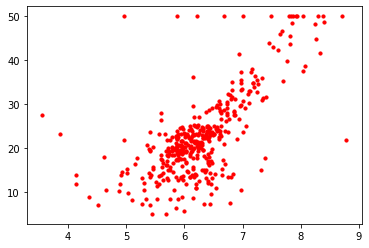

In [71]:
import numpy as np
import pandas as pd

# Boston 주택가격 데이터셋을 가져오기
# from sklearn.datasets import load_boston
# boston = load_boston()
# print(type(boston.data))
# print(boston.DESCR) # 정보를 출력

df = pd.read_csv('boston_train.csv')
import matplotlib.pyplot as plt
# plt.scatter(boston.data[:,5],boston.target,color='r',s=10)
plt.scatter(df['RM'],df['MEDV'],color='r',s=10)
print(df)
plt.show()   # X: 'RM'  , Y : 'MEDV'
# print(boston.data)

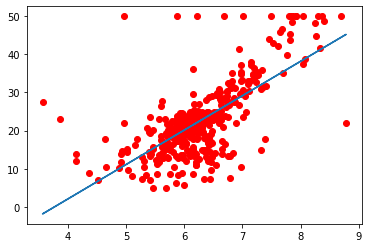

In [65]:
# 1 차원 회귀 모형의 예측

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

x = df['RM'].values.reshape(-1,1) # 2차원, (n,1)
y = df['MEDV'].values.reshape(-1,1)

# x = boston.data[:,5]
# x_1 = np.atleast_2d(x)  # 2차원 (1,n)
# x_2 = np.transpose(x_1) # (n,1)

lr.fit(x,y)  # 회귀 모형을 생성, 학습

# 예측
y_predicted = lr.predict(x)
plt.scatter(x,y,color='r')
plt.plot(x,y_predicted)
plt.show()


In [70]:
# 적합도 측정
# RMSE(Root Mean Squared Error) ,평균 제곱근 오차

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y,lr.predict(x))
rmse = np.sqrt(mse)
print('RMSE:',rmse)

from sklearn.metrics import r2_score
r2 = r2_score(y,lr.predict(x))
print('r2_score:',r2)

RMSE: 6.964958263761021
r2_score: 0.46928062004385107


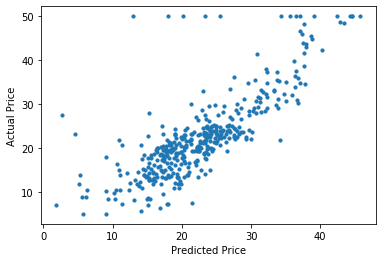

RMSE: 5.753475905312981
r2_score: 0.6378499850549992
RMSE: 4.168349275328514


In [89]:
# 다차원 회귀

x = df.iloc[:,:-1]    # (400, 9)
y = df['MEDV'].values.reshape(-1,1)  # (400, 1)
lr.fit(x,y)  # 회귀 모형을 생성, 학습

y_predict = lr.predict(x) # 예측
# print(x,y_predict)

plt.scatter(y_predict,y,s=10)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.show()

mse = mean_squared_error(y,lr.predict(x))
rmse = np.sqrt(mse)
print('RMSE:',rmse)  # RMSE: 5.753475905312981

r2 = r2_score(y,lr.predict(x))
print('r2_score:',r2)


# test 데이터 셋을 사용한 예측
test = pd.read_csv('boston_test.csv')
x_test = test.iloc[:,:-1]    # (400, 9)
y_test = test['MEDV'].values.reshape(-1,1)  # (400, 1)

y_test_predict = lr.predict(x_test) # 예측
mse = mean_squared_error(y_test,y_test_predict)
rmse = np.sqrt(mse)
print('RMSE:',rmse)  # RMSE: 4.168349275328514

### 랜덤포리스트(RandomForest)

-   의사 결정트리(Decision Tree) 기반 분류 알고리즘
-   Ensemble, Bagging(결정트리를 여러개 사용)

##### 앙상블(Ensemble)
 - (1) Bagging : 같은 유형의 알고리즘을 결합
 
 - (2) Voting : 서로 다른 알고리즘을 가진 분류기를 결합

In [102]:
# RandomForestClassifier 예제
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np

# 데이터 읽어오기
mr = pd.read_csv('mushroom.csv',header=None)
mr

# label = []
# data = []
label = mr.iloc[:,0]    # target, Y값(답) , (p)oisonous, (e)dible
type(label)
data = mr.iloc[:,1:]    # X값 22개의 feature   (8124, 22)
type(data)

# 데이터 내부의 기호를 숫자로 변환하기
label = []   # Y
data = []    # X
attr_list = []
for row_index,row in mr.iterrows():
#     label.append(row.ix[0]) 
    label.append(row.iloc[0]) 
    row_data = []
#    for v in row.ix[1:]:
    for v in row.iloc[1:]:        
        row_data.append(ord(v))
    data.append(row_data)
# print(label)
# print(data)

# train(학습) 전용과 test(예측) 전용 데이터로 나누기
data_train,data_test,label_train,label_test = \
    train_test_split(data,label)
print(len(data_train))  # 6093       75%
print(len(data_test))   # 2031       25%
print(len(label_train))
print(len(label_test))

# 학습 시키기
# 답이 2가지 이므로 binary classification
clf = RandomForestClassifier(n_estimators=100)  # 결정트리의 갯수=100
clf.fit(data_train,label_train)

# 데이터 예측하기
predict = clf.predict(data_test)
# print(predict)
# print(label_test)
ac_score = metrics.accuracy_score(label_test,predict)
print('정답률:',ac_score)  # 1.0  100% 정확도
cl_report = metrics.classification_report(label_test,predict)
print('리포트:\n',cl_report)

6093
2031
6093
2031
정답률: 1.0
리포트:
               precision    recall  f1-score   support

           e       1.00      1.00      1.00      1038
           p       1.00      1.00      1.00       993

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [105]:
ord('a') - 97


0

### PCA(Principal Component Analysis) : 주성분 분석
- 차원 축소 알고리즘, 비지도 학습
- 이미지 데이터의 차원 축소, 자연언어 텍스트 의미 분석

- 과적합을 방지할수 있다

#### 비지도 학습 : 차원축소, 군집화

In [47]:
# PCA 예제

from sklearn.datasets import load_iris
import pandas as df
import matplotlib.pyplot as plt
%matplotlib inline

# iris 데이터를 가져오기
iris = load_iris()
type(iris)  # sklearn.utils.Bunch ==> numpy array의 묶음
type(iris.data)    # X     numpy array
type(iris.target)  # Y     numpy array 
# numpy array를 DataFrame으로 변환
# sepal : 꽃받침    
# petal : 꽃잎
iris_df = pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df  # 원본 컬럼 이름을 출력

# 컬럼 이름을 새로 만들어서 데이터 프레임을 생성
columns = ['sepal_length','sepal_width','petal_length','petal_width']
iris_df = pd.DataFrame(iris.data,columns=columns)

# target 은 'setosa' : 0,  'versicolor' : 1   ,'virginica':2
# 답이 3개 이상인 multi-classification 
iris_df['target'] = iris.target
iris_df  # (150, 5)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


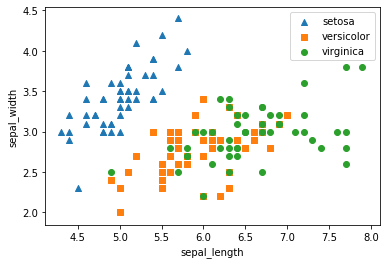

In [48]:
# 원본 데이터의 시각화
# 'setosa' : 세모,  'versicolor' : 네모   ,'virginica': 동그라미
markers = ['^', 's', 'o']

for i , marker in enumerate(markers):
    x = iris_df[iris_df['target']==i]['sepal_length']
    y = iris_df[iris_df['target']==i]['sepal_width']
    plt.scatter(x,y,marker=marker,label=iris.target_names[i])
plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

In [56]:
# 데이터를 표준화하여 정규분포로 전처리
from sklearn.preprocessing import StandardScaler
iris_scaled = StandardScaler().fit_transform(iris_df)
# iris_scaled

# PCA 변환
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # 축소될 차원 설정: 2차원
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)  #  (150,2)

# PCA 변환 데이터를 target을 추가하여 데이터 프레임으로 변경
pca_columns = ['pca_component_1','pca_component_2']
iris_df_pca = pd.DataFrame(iris_pca,columns=pca_columns)
iris_df_pca['target'] = iris.target
iris_df_pca

(150, 2)


,pca_component_1,pca_component_2,target
0,-2.576120,0.474499,0
1,-2.415322,-0.678092,0
2,-2.659333,-0.348282,0
3,-2.601991,-0.603306,0
4,-2.683744,0.640220,0
...,...,...,...
145,2.233024,0.389352,2
146,1.966862,-0.896264,2
147,1.928996,0.268890,2
148,1.806149,1.009217,2


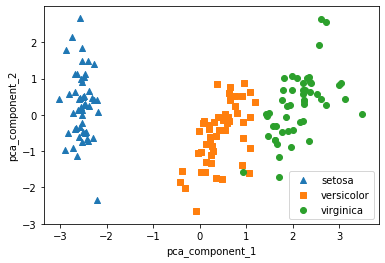

In [57]:
# PCA 데이터의 시각화
# 'setosa' : 세모,  'versicolor' : 네모   ,'virginica': 동그라미
markers = ['^', 's', 'o']

for i , marker in enumerate(markers):
    x = iris_df_pca[iris_df_pca['target']==i]['pca_component_1']
    y = iris_df_pca[iris_df_pca['target']==i]['pca_component_2']
    plt.scatter(x,y,marker=marker,label=iris.target_names[i])
plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [58]:
# 변동성 비율 : 76.7% + 18.2% ==> 95%
print(pca.explained_variance_ratio_)

[0.76740358 0.18282727]


In [68]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(random_state=156,n_estimators=100)

# 원본 데이터로 교차 검증
scores = cross_val_score(rcf,iris.data,iris.target,
                         scoring='accuracy', cv=3)
print(scores)
# [0.98039216 0.92156863 0.95833333]

[0.98039216 0.92156863 0.95833333]


In [69]:
# PCA 데이터로 교차 검증
# pca_x = iris_df_pca[['pca_component_1','pca_component_2']]
pca_x = iris_df_pca.iloc[:,:-1]
scores_pca = cross_val_score(rcf,pca_x,iris.target,
                         scoring='accuracy', cv=3)
print('pca score:',scores_pca)
# pca score: [0.98039216 0.98039216 1.        ]
# 결론 PCA 변환하여 예측한 결과의 정확도가 약간 상승했다

pca score: [0.98039216 0.98039216 1.        ]


### 차원이 매우 많은 경우의 PCA 변환 예제

In [72]:
# 신용카드 고객데이터  가져오기
import pandas as pd

df = pd.read_excel('credit_card.xls',sheet_name='Data')
df.shape     # (30000, 24)
df.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


In [80]:
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'},
                  inplace=True)
X_features = df.drop('default',axis = 1)
X_features.shape   # (30000, 23)
Y_target = df['default']
Y_target.shape     # (30000, 23)

X_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_1        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
dtypes: int64(23)
memory usage: 5.3 MB


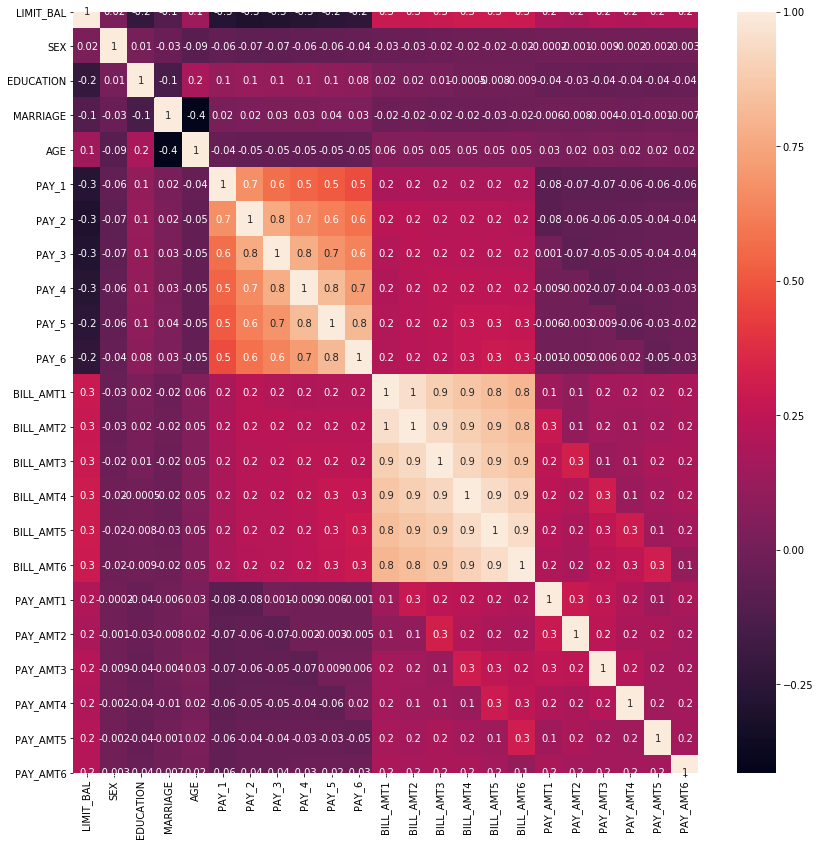

In [89]:
# seaborn 사용 변수간의 상관관계를 heatmap 출력
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr,annot=True, fmt='.1g')

In [97]:
# PCA 변환 : BILL_AMT1 ~ BILL_AMT6 6개를 2개로 축소
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

cols_bill = ['BILL_AMT' + str(i) for i in range(1,7)]
print('상관관계가 높은 속성명:',cols_bill)
# df.columns.values[11:17]

# 6개 컬럼의 데이터를 표준화
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])

# PCA 변환   : 6개를 2개로 축소
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)

print('PCA Component별 변동성:',pca.explained_variance_ratio_)
#  [0.90555253 0.0509867 ]  # 95.5% 

상관관계가 높은 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성: [0.90555253 0.0509867 ]


In [100]:
# 원본 데이터 사용 예측의 정확도 측정 
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf,X_features,Y_target,scoring='accuracy',cv=3)
print("cv=3 원본데이터 예측 정확도:",scores)
print('평균정확도:',np.mean(scores))  # 81.7%

cv=3 원본데이터 예측 정확도: [0.8083 0.8196 0.8232]
평균정확도: 0.8170333333333333


In [101]:
# PCA 변환한 데이터를 사용한 예측의 정확도 측정 : 전체를 6개로 축소
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

pca = PCA(n_components=6)
pca.fit_transform(df_scaled)

scores_pca = cross_val_score(rcf,df_scaled,Y_target,
                             scoring='accuracy',cv=3)
print("cv=3 PCA 변환 데이터 예측 정확도:",scores_pca)
print(' PCA 변환 데이터 평균 정확도:',np.mean(scores_pca))  # # 81.6%

cv=3 PCA 변환 데이터 예측 정확도: [0.8083 0.8194 0.8229]
 PCA 변환 데이터 평균 정확도: 0.8168666666666665


##### 과적합(Overfitting) : 학습 데이터에서는 예측 정확도 높이나오는데
##### 학습에 사용되지 않은 다른 데이터 셋을 사용하여 예측하면 정확도가 떨어지는 경우

### 군집화(Clustering,클러스터링)
#### 비지도 학습

#####  K-means(K-평균) , Mean Shift(평균이동), 친근도전파


### K-means(K-평균) 
- N개의 표본을 K개의 군집으로 나눈다
- 군집화중 가장 많이 사용, 쉽고 간결하다
- 속성(변수)의 갯수가 너무 많으면 정확도가 떨어져서 PCA로 차원 감소가 필요
- 몇개의 군집을 선택해야할지 어렵다

In [8]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
columns = ['sepal_length',
           'sepal_width',
           'petal_length',
           'petal_width']
irisDF = pd.DataFrame(iris.data,columns=columns)
irisDF.shape # (150, 4)
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [9]:
# sklearn.cluster.KMeans(n_clusters=8, init=’k-means++’, n_init=10,
# max_iter=300, tol=0.0001, precompute_distances=’auto’, verbose=0, 
# random_state=None, copy_x=True, n_jobs=None, algorithm=’auto’)

kmeans = KMeans(n_clusters=3, init='k-means++',max_iter=300,
                random_state=0).fit(irisDF)
print(kmeans)
type(kmeans)  #sklearn.cluster.k_means_.KMeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)


sklearn.cluster.k_means_.KMeans

In [10]:
print(kmeans.labels_)      # 각 데이터트가 속한 군집 중심점의 레이블
print(kmeans.cluster_centers_) # 중심점 실제 좌표값

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [11]:
pd.set_option('display.max_rows',500)
irisDF.head(10)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [12]:
irisDF['cluster'] = kmeans.labels_  # 원본 소스에 누락된 라인!!
irisDF['target'] = iris.target
irisDF
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)
# target이 0인 데이터는 1번 군집에 50개
# target이 1인 데이터는 0번 군집에 48개,2번 군집에 2개
# target이 2인 데이터는 0번 군집에 4개, 2번 군집에 36개로 생성

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [13]:
# KMeans기초예제 : scikit-learn 도움말의 Example
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
               [10, 2], [10, 4], [10, 0]])  # (6,2)
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_
# array([1, 1, 1, 0, 0, 0], dtype=int32)
kmeans.predict([[0, 0], [12, 3]])
# array([1, 0], dtype=int32)
kmeans.cluster_centers_
# array([[10.,  2.],
#        [ 1.,  2.]])

array([[10.,  2.],
       [ 1.,  2.]])

In [14]:
# iris 군집화 결과를 시각화하기

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)
pca_transformed

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
# irisDF

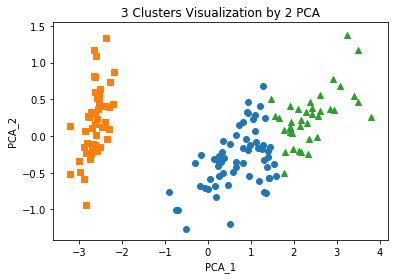

In [15]:
marker0_ind = irisDF[irisDF['cluster'] == 0].index  # 0번 군집의 행번호
marker1_ind = irisDF[irisDF['cluster'] == 1].index  # 1번 군집의 행번호
marker2_ind = irisDF[irisDF['cluster'] == 2].index  # 2번 군집의 행번호

plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'] , 
            y=irisDF.loc[marker0_ind,'pca_y'], marker='o')

plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'] , 
            y=irisDF.loc[marker1_ind,'pca_y'], marker='s')

plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'] , 
            y=irisDF.loc[marker2_ind,'pca_y'], marker='^')

plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.title('3 Clusters Visualization by 2 PCA')
plt.show()
# Cluster 1(네모)는 다른 군집과 명확히 군집화 되었음
# Cluster 0(동그라미) 과 Cluster 2(세모)는 덜 분리되어짐

### 군집 평가(Clustaer Evaluation)

In [16]:
# 실루엣(silhouette) 분석
# 실루엣 계수 : 군집화의 지표, 높을수로 좋음

from sklearn.metrics import silhouette_samples,silhouette_score


kmeans = KMeans(n_clusters=3, init='k-means++',max_iter=300,
                random_state=0).fit(irisDF)
irisDF['cluster'] = kmeans.labels_

# silhouette_samples() : 모든 개별데이터의 실루엣 계수를 구함
score_samples = silhouette_samples(iris.data,irisDF['cluster'])
# print(score_samples)   # (150,)

irisDF['silhouette_coeff'] = score_samples
irisDF

# silhouette_score( ): 평균 실루엣 계수를 구함
average_score = silhouette_score(iris.data,irisDF['cluster'])
print('iris K-means 평균 실루엣 계수:',average_score) # 0.55

iris K-means 평균 실루엣 계수: 0.5528190123564091


In [17]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

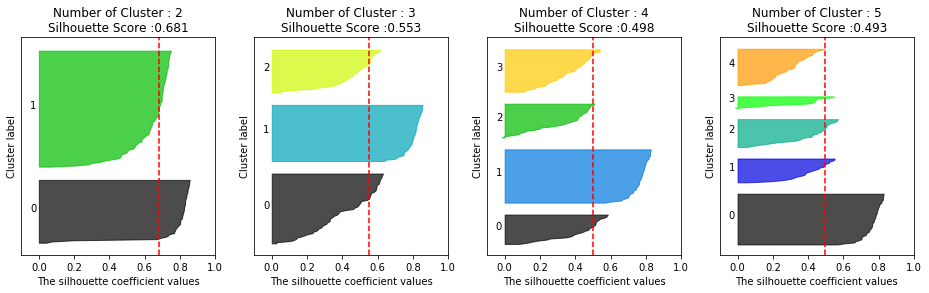

In [18]:
visualize_silhouette([2,3,4,5],iris.data)

In [19]:
from sklearn.base import TransformerMixin

class A(TransformerMixin):
    def fit(self,X):
        print('fit:',X)
        return self
    
    def transform(self,X):
        print('trans:',X)  
        return X
    
inst = A()
inst.fit('x_data')
inst.transform('y_data')
inst.fit_transform('my_data')

# <출력>

# fit: x_data
# trans: y_data
# fit: my_data
# trans: my_data

fit: x_data
trans: y_data
fit: my_data
trans: my_data


'my_data'

### 평균이동(Mean Shift)
- 대역폭(bandwith)를 사용하여밀도가 높는곳으로 이동하여 중심을 찾는다
- cluster(군집)의 갯수를 지정하지 않아도 자동으로 설정된다
- 이미지나 영상데이터 처리에 자주 사용된다

In [119]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

# make_blobs(): 임의의 데이터셋을 생성
x, y = make_blobs(n_samples=200,n_features=2, centers=3,
                 cluster_std=0.6, random_state=0)  # 원본소스수정 0.8-->0.6
print('x:',x.shape)  # (200,2)
print('y:',y.shape)  # (200,)

# bandwidth=0.62일때  --> 8개 cluster
meanshift = MeanShift(bandwidth=0.62)
cluster_labels = meanshift.fit_predict(x)
print('cluster labels:',np.unique(cluster_labels))  

# bandwidth=1.114 일때  --. 3개 cluster
meanshift = MeanShift(bandwidth=1.114)
cluster_labels = meanshift.fit_predict(x)
print('cluster labels:',np.unique(cluster_labels))


x: (200, 2)
y: (200,)
cluster labels: [0 1 2 3 4 5 6 7]
cluster labels: [0 1 2]


In [120]:
# bandwidth 의 최적값을 구하기
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(x, quantile=0.2)
print('bandwidth:',round(bandwidth,3) ) # 1.114

bandwidth: 1.114


In [121]:
# 평균이동(Mean Shift) 및 시각화

import pandas as pd

clusterDF = pd.DataFrame(data=x,columns=['ftr1','ftr2'])
clusterDF['target'] = y     # [0,1,2]
clusterDF

# estimate_bandwidth() 사용하여 최적의 bandwidth계산
best_bandwidth = estimate_bandwidth(x,quantile=0.2)
print(best_bandwidth)

meanshift = MeanShift(bandwidth=best_bandwidth) # 원본소스 오타
cluster_labels = meanshift.fit_predict(x)
print('cluster labels:',np.unique(cluster_labels))

1.113759224777449
cluster labels: [0 1 2]


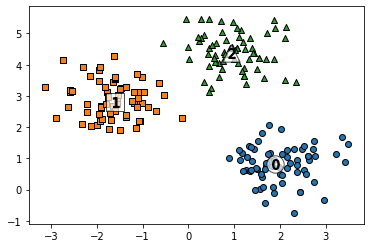

target  meanshift_label
0       2                  67
1       0                  67
2       1                  66
Name: meanshift_label, dtype: int64


In [122]:
# matplotlib로 시각화
clusterDF['meanshift_label'] = cluster_labels
# clusterDF
centers = meanshift.cluster_centers_
# centers
unique_labels = np.unique(cluster_labels)   # [0 1 2]
markers = ['o','s','^','x','*']

for label in unique_labels :
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    
    plt.scatter(x=label_cluster['ftr1'],y=label_cluster['ftr2'],
               edgecolor='k',marker=markers[label])
    # 중심점(center)을 표시
    plt.scatter(x=center_x_y[0],y=center_x_y[1],s=300,color='white',
               edgecolor='k',alpha = 0.7, marker=markers[label])

    plt.scatter(x=center_x_y[0],y=center_x_y[1],s=100,color='k',
               edgecolor='k', marker='$%d$'%label)
              
    
plt.show()
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

In [126]:
# 실루엣(silhouette) 분석
# 실루엣 계수 : 군집화의 지표, 높을수로 좋음

from sklearn.metrics import silhouette_samples,silhouette_score

# silhouette_samples() : 모든 개별데이터의 실루엣 계수를 구함
score_samples = silhouette_samples(x,clusterDF['meanshift_label'])
# print(score_samples)   

clusterDF['silhouette_coeff'] = score_samples
clusterDF

# silhouette_score( ): 평균 실루엣 계수를 구함
average_score = silhouette_score(x,clusterDF['meanshift_label'])
print('Mean Shift 평균 실루엣 계수:',average_score) # 0.677

Mean Shift 평균 실루엣 계수: 0.6771591392061186


cluster_centers: [[ 0.92284077 -0.94786827]
 [-0.92331159 -0.99553816]
 [ 0.98305835  0.89701482]]
number of estimated clusters : 3


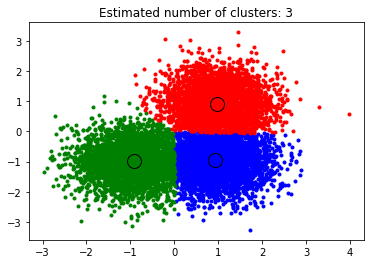

In [35]:
# A demo of the mean-shift clustering algorithm
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs

# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)

# #############################################################################
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
print('cluster_centers:',cluster_centers)
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# Generate sample data
# centers = [[1, 1], [-1, -1], [1, -1]]

### XGBoost (eXtra Gradient Boost)

### 앙상블  , 부스팅에 속함, 속도가 빠름, 과적합에 강하다

- (1) 파이썬 XGBoost
- (2) 사이킷런 XGBoost : XGBoostClasifier,XGBoostRegressor

### 파이썬 XGBoost

In [28]:
# xgboost 모듈 설치 : pip install xgboost
import xgboost as xgb
from xgboost import plot_importance

print(xgb.__version__)
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
dataset.data.shape    # (569,30)
dataset.target.shape  # (569,)   , malignant(악성) : 0, benign(양성):1

x_feautures = dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=x_feautures,columns=dataset.feature_names)
cancer_df['target'] = y_label
cancer_df

0.90


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [29]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())
# print(dataset.DESCR)

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [30]:
### train data : 80%  ,   test data : 20% 
x_train, x_test, y_train, y_test = train_test_split(x_feautures,y_label,
                                        test_size=0.2,random_state=0)
print(x_train.shape,x_test.shape)
type(x_train)

(455, 30) (114, 30)


numpy.ndarray

In [4]:
dtrain = xgb.DMatrix(data=x_train, label=y_train)
dtest = xgb.DMatrix(data=x_test, label=y_test)
type(dtest)  # xgboost.core.DMatrix

xgboost.core.DMatrix

In [5]:
params = { 'max_depth':3, # 트리의 최대 깊이
            'eta' : 0.1,   # 학습율
            'objective':'binary:logistic',  # 2진 분류
            'eval_metric':'logloss',       # 손실함수
            'early_stoppings' : 100
}

num_round = 400

In [6]:
wlist = [(dtrain,'train'),(dtest,'eval')]
xgb_model = xgb.train(params=params,dtrain=dtrain,num_boost_round=num_round,
          evals=wlist)

[0]	train-logloss:0.61167	eval-logloss:0.613695
[1]	train-logloss:0.544351	eval-logloss:0.545425
[2]	train-logloss:0.486154	eval-logloss:0.489016
[3]	train-logloss:0.438088	eval-logloss:0.440352
[4]	train-logloss:0.394117	eval-logloss:0.399575
[5]	train-logloss:0.356264	eval-logloss:0.364347
[6]	train-logloss:0.325146	eval-logloss:0.332736
[7]	train-logloss:0.295618	eval-logloss:0.306005
[8]	train-logloss:0.269782	eval-logloss:0.282808
[9]	train-logloss:0.24725	eval-logloss:0.261858
[10]	train-logloss:0.227723	eval-logloss:0.243811
[11]	train-logloss:0.210154	eval-logloss:0.227002
[12]	train-logloss:0.194442	eval-logloss:0.213091
[13]	train-logloss:0.180529	eval-logloss:0.200189
[14]	train-logloss:0.166958	eval-logloss:0.186999
[15]	train-logloss:0.155558	eval-logloss:0.176615
[16]	train-logloss:0.144616	eval-logloss:0.167341
[17]	train-logloss:0.135201	eval-logloss:0.157389
[18]	train-logloss:0.126083	eval-logloss:0.150211
[19]	train-logloss:0.118484	eval-logloss:0.142762
[20]	train-l

[164]	train-logloss:0.007838	eval-logloss:0.048751
[165]	train-logloss:0.007801	eval-logloss:0.048409
[166]	train-logloss:0.00778	eval-logloss:0.04845
[167]	train-logloss:0.007761	eval-logloss:0.048404
[168]	train-logloss:0.007741	eval-logloss:0.048245
[169]	train-logloss:0.007722	eval-logloss:0.048265
[170]	train-logloss:0.007703	eval-logloss:0.048311
[171]	train-logloss:0.007685	eval-logloss:0.048147
[172]	train-logloss:0.007666	eval-logloss:0.048265
[173]	train-logloss:0.007622	eval-logloss:0.048387
[174]	train-logloss:0.007604	eval-logloss:0.048226
[175]	train-logloss:0.007586	eval-logloss:0.048304
[176]	train-logloss:0.00756	eval-logloss:0.048426
[177]	train-logloss:0.007543	eval-logloss:0.048454
[178]	train-logloss:0.007495	eval-logloss:0.048619
[179]	train-logloss:0.007478	eval-logloss:0.048464
[180]	train-logloss:0.007461	eval-logloss:0.04851
[181]	train-logloss:0.007445	eval-logloss:0.048469
[182]	train-logloss:0.007429	eval-logloss:0.048701
[183]	train-logloss:0.007412	eval-l

[326]	train-logloss:0.005888	eval-logloss:0.045092
[327]	train-logloss:0.005881	eval-logloss:0.045004
[328]	train-logloss:0.005874	eval-logloss:0.045043
[329]	train-logloss:0.005867	eval-logloss:0.045092
[330]	train-logloss:0.00586	eval-logloss:0.045146
[331]	train-logloss:0.005853	eval-logloss:0.044989
[332]	train-logloss:0.005846	eval-logloss:0.045048
[333]	train-logloss:0.005839	eval-logloss:0.044971
[334]	train-logloss:0.005832	eval-logloss:0.04481
[335]	train-logloss:0.005825	eval-logloss:0.044871
[336]	train-logloss:0.005818	eval-logloss:0.044909
[337]	train-logloss:0.005811	eval-logloss:0.044963
[338]	train-logloss:0.005804	eval-logloss:0.044807
[339]	train-logloss:0.005798	eval-logloss:0.044863
[340]	train-logloss:0.005791	eval-logloss:0.044847
[341]	train-logloss:0.005784	eval-logloss:0.044686
[342]	train-logloss:0.005777	eval-logloss:0.044725
[343]	train-logloss:0.005771	eval-logloss:0.044781
[344]	train-logloss:0.005764	eval-logloss:0.044709
[345]	train-logloss:0.005757	eval

In [7]:
# XGBoost 의 predict()함수 사용 예측
pred_probs = xgb_model.predict(dtest)
np.round(pred_probs)

preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
preds[:10]

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [8]:
# 정확도 평가

from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score,roc_auc_score
from sklearn.metrics import classification_report

# 정확도(accuracy)
accuracy = accuracy_score(y_test,preds)
print('정확도:',accuracy)

# 오차 행렬(confusion matrix)
confusion = confusion_matrix(y_test,preds)
print('오차행렬:\n',confusion)

# 정밀도(precision)
precision = precision_score(y_test,preds)
print('정밀도:',precision)
print('TP/(FP+TP):',67/(67+1))

# 재현율(recall)
recall = recall_score(y_test,preds)
print('재현율:',recall)
print('TP/(FN+TP):',67/(0+67))

# F1-스코어(f1_score)
f1 = f1_score(y_test,preds)
print('F1-스코어:',f1)
print(2/((1/recall)+(1/precision)))
print(2*recall*precision/(recall+precision))

# roc_auc
roc_auc = roc_auc_score(y_test,preds)
print('roc_auc:',roc_auc)

report = classification_report(y_test,preds)
print('리포트:\n',report)

정확도: 0.9912280701754386
오차행렬:
 [[46  1]
 [ 0 67]]
정밀도: 0.9852941176470589
TP/(FP+TP): 0.9852941176470589
재현율: 1.0
TP/(FN+TP): 1.0
F1-스코어: 0.9925925925925926
0.9925925925925925
0.9925925925925926
roc_auc: 0.9893617021276595
리포트:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        47
           1       0.99      1.00      0.99        67

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



## 정확도(accuracy) =  맞은갯수  /전체 갯수
####                              = (TN + TP)/(TN+FP+FN+TP)

#### 오차 행렬  : 
  - True: 맞음,False:틀림
  - Negative : 0 , Positive : 1

  #####  [[ TN,FP],       True Negative, False Positive
  #####  [ FN,TP]]        False Negative, True Positive
  
#### 정밀도(precision) = TP/(FP+TP)  , 답이 1인것을 맞춘 비율

####  재현율(recall) = TP/(FN + TP)


#### F1-스코어 = 2 / (( 1/재현율) + (1/정밀도)) , feature의 중요도


#### ROC(Receiver Operation Curve) :수신자 판단 곡선
-  x축을 FPR(False Positive Rate) :  FP/(FP+TN) 
-  y축을 TPR(True Positiver Rate) : TP/(FN+TP)

#### AUC(Area Under Curve) : ROC곡선 밑의 면적

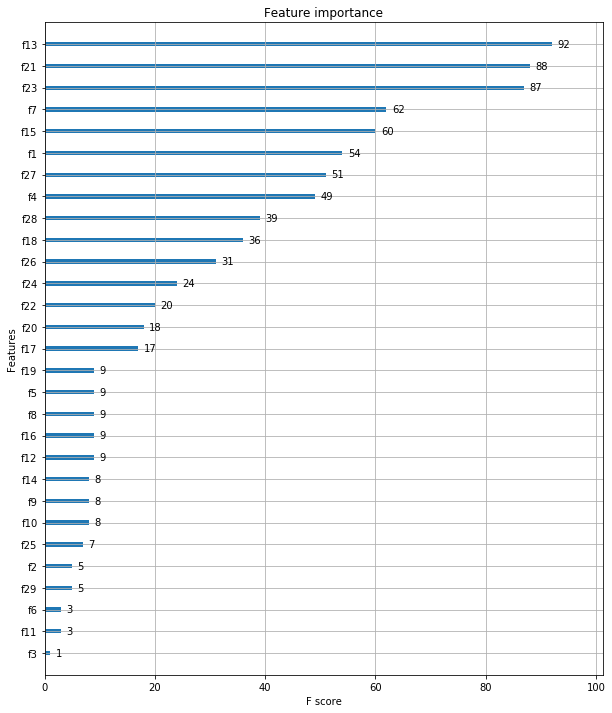

In [12]:
# plot_importance()  : 피처의 중요도를 그래프로 출력
import matplotlib.pyplot as plt
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)

#### 사이킷런 Wrapper XGBoost 개요  및 적용
- XGBoostClassifier
- XGBoostRegressor

In [31]:
# 사이킷런의 래퍼 : XGBoostClassifier 
from xgboost import XGBClassifier

evals =[(x_test,y_test)]

#  n_estimators = num_boost_round
xgb_wrapper = XGBClassifier(n_estimators=400,learning_rate=0.1,max_depth=3)
xgb_wrapper.fit(x_train,y_train,early_stopping_rounds=400,eval_set=evals,
               eval_metric='logloss',verbose=True)
w_preds= xgb_wrapper.predict(x_test)

[0]	validation_0-logloss:0.613695
Will train until validation_0-logloss hasn't improved in 400 rounds.
[1]	validation_0-logloss:0.545425
[2]	validation_0-logloss:0.489016
[3]	validation_0-logloss:0.440352
[4]	validation_0-logloss:0.399575
[5]	validation_0-logloss:0.364347
[6]	validation_0-logloss:0.332736
[7]	validation_0-logloss:0.306005
[8]	validation_0-logloss:0.282808
[9]	validation_0-logloss:0.261858
[10]	validation_0-logloss:0.243811
[11]	validation_0-logloss:0.227002
[12]	validation_0-logloss:0.213091
[13]	validation_0-logloss:0.200189
[14]	validation_0-logloss:0.186999
[15]	validation_0-logloss:0.176615
[16]	validation_0-logloss:0.167341
[17]	validation_0-logloss:0.157389
[18]	validation_0-logloss:0.150211
[19]	validation_0-logloss:0.142762
[20]	validation_0-logloss:0.136049
[21]	validation_0-logloss:0.13016
[22]	validation_0-logloss:0.123783
[23]	validation_0-logloss:0.118088
[24]	validation_0-logloss:0.114797
[25]	validation_0-logloss:0.111367
[26]	validation_0-logloss:0.1070

[230]	validation_0-logloss:0.048158
[231]	validation_0-logloss:0.048198
[232]	validation_0-logloss:0.04817
[233]	validation_0-logloss:0.048199
[234]	validation_0-logloss:0.04801
[235]	validation_0-logloss:0.048059
[236]	validation_0-logloss:0.047842
[237]	validation_0-logloss:0.047895
[238]	validation_0-logloss:0.047812
[239]	validation_0-logloss:0.047909
[240]	validation_0-logloss:0.0477
[241]	validation_0-logloss:0.047729
[242]	validation_0-logloss:0.047796
[243]	validation_0-logloss:0.047688
[244]	validation_0-logloss:0.047562
[245]	validation_0-logloss:0.047513
[246]	validation_0-logloss:0.047562
[247]	validation_0-logloss:0.047358
[248]	validation_0-logloss:0.047388
[249]	validation_0-logloss:0.047451
[250]	validation_0-logloss:0.047492
[251]	validation_0-logloss:0.047545
[252]	validation_0-logloss:0.047362
[253]	validation_0-logloss:0.047257
[254]	validation_0-logloss:0.047301
[255]	validation_0-logloss:0.047102
[256]	validation_0-logloss:0.047155
[257]	validation_0-logloss:0.047

In [32]:
# 정확도 평가

from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score,roc_auc_score
from sklearn.metrics import classification_report


def get_clf_eval(y_test,preds):
    # 정확도(accuracy)
    accuracy = accuracy_score(y_test,preds)
    print('정확도:',accuracy)

    # 오차 행렬(confusion matrix)
    confusion = confusion_matrix(y_test,preds)
    print('오차행렬:\n',confusion)

    # 정밀도(precision)
    precision = precision_score(y_test,preds)
    print('정밀도:',precision)
#     print('TP/(FP+TP):',67/(67+1))

    # 재현율(recall)
    recall = recall_score(y_test,preds)
    print('재현율:',recall)
#     print('TP/(FN+TP):',67/(0+67))

    # F1-스코어(f1_score)
    f1 = f1_score(y_test,preds)
    print('F1-스코어:',f1)
#     print(2/((1/recall)+(1/precision)))
#     print(2*recall*precision/(recall+precision))

    # roc_auc
    roc_auc = roc_auc_score(y_test,preds)
    print('roc_auc:',roc_auc)

# report = classification_report(y_test,preds)
# print('리포트:\n',report)

In [33]:
get_clf_eval(y_test,w_preds)

정확도: 0.9912280701754386
오차행렬:
 [[46  1]
 [ 0 67]]
정밀도: 0.9852941176470589
재현율: 1.0
F1-스코어: 0.9925925925925926
roc_auc: 0.9893617021276595


In [35]:
# 사이킷런의 래퍼 : XGBoostClassifier 
from xgboost import XGBClassifier

evals =[(x_test,y_test)]
xgb_wrapper = XGBClassifier(n_estimators=400,learning_rate=0.1,max_depth=3)
xgb_wrapper.fit(x_train,y_train,early_stopping_rounds=10,eval_set=evals,
               eval_metric='logloss',verbose=True)
ws100_preds= xgb_wrapper.predict(x_test)

[0]	validation_0-logloss:0.613695
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.545425
[2]	validation_0-logloss:0.489016
[3]	validation_0-logloss:0.440352
[4]	validation_0-logloss:0.399575
[5]	validation_0-logloss:0.364347
[6]	validation_0-logloss:0.332736
[7]	validation_0-logloss:0.306005
[8]	validation_0-logloss:0.282808
[9]	validation_0-logloss:0.261858
[10]	validation_0-logloss:0.243811
[11]	validation_0-logloss:0.227002
[12]	validation_0-logloss:0.213091
[13]	validation_0-logloss:0.200189
[14]	validation_0-logloss:0.186999
[15]	validation_0-logloss:0.176615
[16]	validation_0-logloss:0.167341
[17]	validation_0-logloss:0.157389
[18]	validation_0-logloss:0.150211
[19]	validation_0-logloss:0.142762
[20]	validation_0-logloss:0.136049
[21]	validation_0-logloss:0.13016
[22]	validation_0-logloss:0.123783
[23]	validation_0-logloss:0.118088
[24]	validation_0-logloss:0.114797
[25]	validation_0-logloss:0.111367
[26]	validation_0-logloss:0.10701

In [36]:
get_clf_eval(y_test,w_preds)

정확도: 0.9912280701754386
오차행렬:
 [[46  1]
 [ 0 67]]
정밀도: 0.9852941176470589
재현율: 1.0
F1-스코어: 0.9925925925925926
roc_auc: 0.9893617021276595


### LightGBM
- Microsoft 사 제공
- 부스팅, XGBoost보다 속도가 빠르다, 메모리 사용량이 적다
- 적은 데이터 세트에서 과적합이 발생할수 있다, 10000 이상의 데이터세트에 적당

In [38]:
# pip install lightgbm
import lightgbm
lightgbm.__version__

'2.3.0'

In [42]:
from lightgbm import LGBMClassifier
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
# dataset.data.shape    # (569,30)
# dataset.target.shape  # (569,)   , malignant(악성) : 0, benign(양성):1

ftr = dataset.data
target = dataset.target

### train data : 80%  ,   test data : 20% 
x_train, x_test, y_train, y_test = train_test_split(ftr,target,
                                        test_size=0.2,random_state=0)
# print(x_train.shape,x_test.shape)
# type(x_train)

lgbm_wrapper = LGBMClassifier(n_estimators=400)
evals = [(x_test,y_test)]

lgbm_wrapper.fit(x_train,y_train,early_stopping_rounds=100,
                 eval_metric='logloss',eval_set=evals,verbose=True)
preds = lgbm_wrapper.predict(x_test)

[1]	valid_0's binary_logloss: 0.602575
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.536123
[3]	valid_0's binary_logloss: 0.482224
[4]	valid_0's binary_logloss: 0.439121
[5]	valid_0's binary_logloss: 0.401652
[6]	valid_0's binary_logloss: 0.369608
[7]	valid_0's binary_logloss: 0.339508
[8]	valid_0's binary_logloss: 0.308011
[9]	valid_0's binary_logloss: 0.282286
[10]	valid_0's binary_logloss: 0.264115
[11]	valid_0's binary_logloss: 0.247501
[12]	valid_0's binary_logloss: 0.227207
[13]	valid_0's binary_logloss: 0.21243
[14]	valid_0's binary_logloss: 0.196367
[15]	valid_0's binary_logloss: 0.186107
[16]	valid_0's binary_logloss: 0.172722
[17]	valid_0's binary_logloss: 0.163437
[18]	valid_0's binary_logloss: 0.153542
[19]	valid_0's binary_logloss: 0.146355
[20]	valid_0's binary_logloss: 0.138397
[21]	valid_0's binary_logloss: 0.133204
[22]	valid_0's binary_logloss: 0.126256
[23]	valid_0's binary_logloss: 0.120182
[24]	valid_0's binary_loglos

In [43]:
get_clf_eval(y_test,preds)

# XGBoost보디 정확도가 다소 떨어짐  , 99.1% --> 97.3%
# 원인 : 데이터셋이 지나치게 적음(560개) , 1만개 이상 필요

정확도: 0.9736842105263158
오차행렬:
 [[45  2]
 [ 1 66]]
정밀도: 0.9705882352941176
재현율: 0.9850746268656716
F1-스코어: 0.9777777777777777
roc_auc: 0.971260717688155


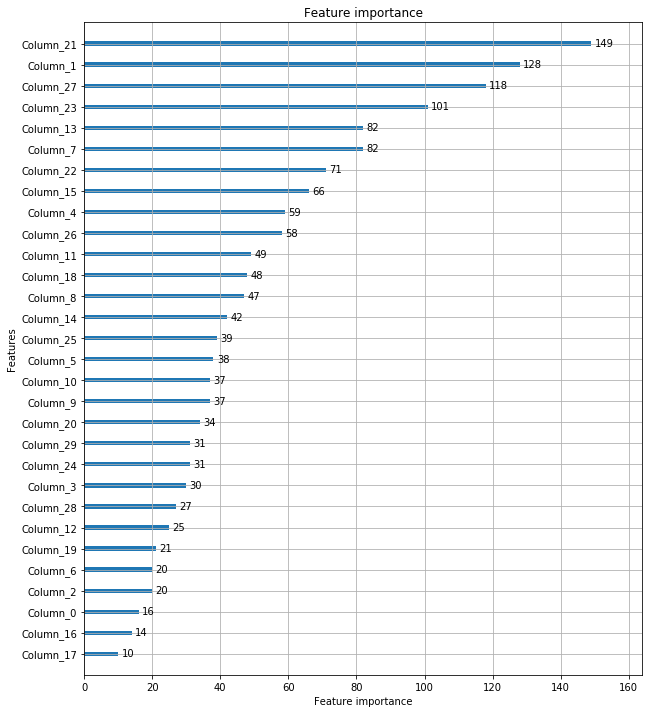

In [44]:
# plot_importance()  : 피처의 중요도를 그래프로 출력
import matplotlib.pyplot as plt
from lightgbm import plot_importance

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper, ax=ax)

### 캐글 신용카드 사기 검출 예제
- LightGBM : 대용량 데이터 세트을 처리
- 이상치를 제거 : IQR을 사용
- 오버샘플링 : 적은 데이터 세트를 증식하여 충분한 데이터를 확보


In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

card_df = pd.read_csv('creditcard.csv')

card_df.shape     #  (284807, 31)

card_df.head(3)  # 사용자 비밀 보호를 위해 PCA변환된 피쳐로 추정

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [162]:
# 원본의 사본을 만들어서 Time 컬럼을 삭제
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time',axis=1,inplace=True)
    print(df_copy.shape)
    print(df_copy.iloc[:,-1].value_counts())
    return df_copy

In [163]:
# 학습데이터와 테스트 데이터를 추출한다
from sklearn.model_selection import train_test_split

def get_train_test_dataset(df=None):
    df_copy = get_preprocessed_df(df)
    # DataFrame의 맨 마지막 컬럼이 레이블, 나머지는 피처들
    x_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]
    x_train,x_test,y_train,y_test = \
       train_test_split(x_features, y_target, test_size=0.3, 
                        random_state=0, stratify=y_target)   
# stratified방식 : 학습 데이터와 테스트 데이터의 label의 값의 분포를
#                    동일하게 만들도록 설정한다
    
    return x_train,x_test,y_train,y_test
 
x_train,x_test,y_train,y_test = get_train_test_dataset(card_df)

(284807, 30)
0    284315
1       492
Name: Class, dtype: int64


In [164]:
print('y_train:\n',y_train.value_counts())
print(y_train.value_counts()/y_train.shape[0] * 100)

print('y_test:\n',y_test.value_counts())
print(y_test.value_counts()/y_test.shape[0] * 100)

y_train:
 0    199020
1       344
Name: Class, dtype: int64
0    99.827451
1     0.172549
Name: Class, dtype: float64
y_test:
 0    85295
1      148
Name: Class, dtype: int64
0    99.826785
1     0.173215
Name: Class, dtype: float64


In [165]:
# LogisticRegression

from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(x_train,y_train)
lr_pred = lr_clf.predict(x_test)

get_clf_eval(y_test,lr_pred)

정확도: 0.99916903666772
오차행렬:
 [[85282    13]
 [   58    90]]
정밀도: 0.8737864077669902
재현율: 0.6081081081081081
F1-스코어: 0.7171314741035857
roc_auc: 0.8039778479458413


In [166]:
from lightgbm import LGBMClassifier

def get_model_train_eval(model,ftr_train=None,ftr_test=None,
                         tgt_train=None,tgt_test=None):
    model.fit(ftr_train,tgt_train)
    pred = model.predict(ftr_test)
    get_clf_eval(tgt_test,pred)

In [167]:
lgmb_clf = LGBMClassifier(n_estimators=1000,num_leaves=64,n_jobs=-1,
                         boost_from_average=False)
get_model_train_eval(lgmb_clf,ftr_train=x_train,ftr_test=x_test,
                    tgt_train=y_train,tgt_test=y_test)

# LogisticRegression 보다 재현율과 ROC_AUC값이 증가

정확도: 0.9995084442259752
오차행렬:
 [[85289     6]
 [   36   112]]
정밀도: 0.9491525423728814
재현율: 0.7567567567567568
F1-스코어: 0.8421052631578948
roc_auc: 0.8783432063284341


### 전처리후 모델 학습/예측/평가
- 표준화, StandScaler
- 로그변환
- 이상치를 IQR을 사용하여 제거
- 오버샘플링하여 데이터세트를 충분히 확보

1.00       13688
1.98        6044
0.89        4872
9.99        4747
15.00       3280
           ...  
192.63         1
218.84         1
195.52         1
793.50         1
1080.06        1
Name: Amount, Length: 32767, dtype: int64

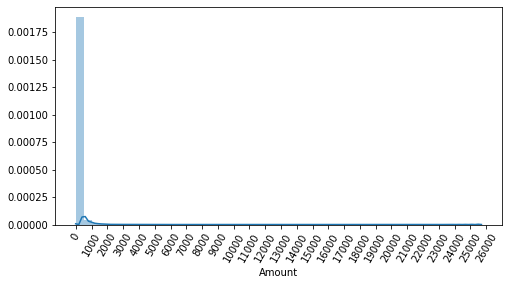

In [168]:
# 데이터의 분포도 출력

import seaborn as sns

plt.figure(figsize=(8,4))
plt.xticks(range(0,30000,1000),rotation=60)
sns.distplot(card_df['Amount'])
card_df['Amount'].value_counts()

In [169]:
# Amount 피처를 StandardScaler로 표준화하여 정규분포 형태로 변환

from sklearn.preprocessing import StandardScaler

def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
    
    # 변환된 Amount를 새로운 컬럼으로 데이터프레임에 추가
    df_copy.insert(0,'Amount_Scaled',amount_n)
    
    # 기존 'Time'과 'Amount' 컬럼을 삭제한다
    df_copy.drop(['Time','Amount'],axis=1,inplace=True)
    print(df_copy.shape)
    print(df_copy.iloc[:,-1].value_counts())
    return df_copy

In [170]:
# Scaled 된 Amount를 사용하여 로지스틱 회귀와 LightGBM을 수행
x_train,x_test,y_train,y_test = get_train_test_dataset(card_df)

print('### 로지스틱회귀  ####')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf,ftr_train=x_train,ftr_test=x_test,
                    tgt_train=y_train,tgt_test=y_test)

print('#### LightGBM ####')
lgbm_clf = LGBMClassifier(n_estimators=1000,num_leaves=64,n_jobs=-1,
                         boost_from_average=False)
get_model_train_eval(lgbm_clf,ftr_train=x_train,ftr_test=x_test,
                    tgt_train=y_train,tgt_test=y_test)

# 결론 : StandardScaler를 사용한 데이터의 예측 정확도는 크게 개선되지 않음

(284807, 30)
0    284315
1       492
Name: Class, dtype: int64
### 로지스틱회귀  ####
정확도: 0.9991573329588147
오차행렬:
 [[85281    14]
 [   58    90]]
정밀도: 0.8653846153846154
재현율: 0.6081081081081081
F1-스코어: 0.7142857142857144
roc_auc: 0.8039719859375173
#### LightGBM ####
정확도: 0.9995084442259752
오차행렬:
 [[85289     6]
 [   36   112]]
정밀도: 0.9491525423728814
재현율: 0.7567567567567568
F1-스코어: 0.8421052631578948
roc_auc: 0.8783432063284341


In [171]:
# 로그변환
# 데이터 분포도가 심하게 왜곡되었을 때 큰 값을 상대적으로 작은 값으로 
# 변환하기 때문에 분포도를 개선시킴

def get_preprocessed_df(df=None):
    df_copy = df.copy()
    
    amount_n = np.log1p(df['Amount'])
    
    # 변환된 Amount를 새로운 컬럼으로 데이터프레임에 추가
    df_copy.insert(0,'Amount_Scaled',amount_n)
    
    # 기존 'Time'과 'Amount' 컬럼을 삭제한다
    df_copy.drop(['Time','Amount'],axis=1,inplace=True)
    print(df_copy.shape)
    print(df_copy.iloc[:,-1].value_counts())
    return df_copy

In [172]:
# np.log(x)
# np.log1p(x) : one plus , --> np.log(x+1)
print('np.log  :',np.log([0,1,2,3,4,5]))
print('np.log1p:',np.log1p([0,1,2,3,4,5]))
card_df

np.log  : [      -inf 0.         0.69314718 1.09861229 1.38629436 1.60943791]
np.log1p: [0.         0.69314718 1.09861229 1.38629436 1.60943791 1.79175947]


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [173]:
# Scaled 된 Amount를 사용하여 로지스틱 회귀와 LightGBM을 수행
x_train,x_test,y_train,y_test = get_train_test_dataset(card_df)

print('### 로지스틱회귀  ####')
get_model_train_eval(lr_clf,ftr_train=x_train,ftr_test=x_test,
                    tgt_train=y_train,tgt_test=y_test)

print('#### LightGBM ####')
get_model_train_eval(lgbm_clf,ftr_train=x_train,ftr_test=x_test,
                    tgt_train=y_train,tgt_test=y_test)

# 로그변환도 개선이 미비하다

(284807, 30)
0    284315
1       492
Name: Class, dtype: int64
### 로지스틱회귀  ####
정확도: 0.9991807403766253
오차행렬:
 [[85283    12]
 [   58    90]]
정밀도: 0.8823529411764706
재현율: 0.6081081081081081
F1-스코어: 0.72
roc_auc: 0.8039837099541655
#### LightGBM ####
정확도: 0.9995318516437859
오차행렬:
 [[85290     5]
 [   35   113]]
정밀도: 0.9576271186440678
재현율: 0.7635135135135135
F1-스코어: 0.849624060150376
roc_auc: 0.8817274467151365


### IQR(Inter Quantile Range)을 이용한 이상치 제거후 예측/평가

- IQR : Q1(25%)~Q3(75%) , 1사분위수 부터 3사분위수의 범위 내
- 최대값 : Q3 + IQR*1.5
- 최소값 : Q1 - IQR*1.5

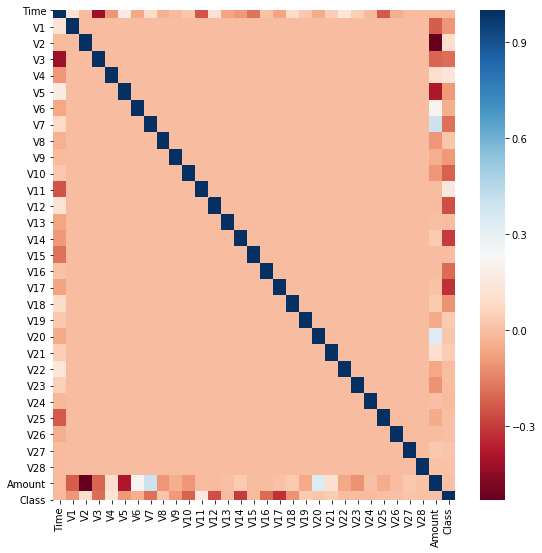

In [174]:
import seaborn as sns

plt.figure(figsize=(9,9))
corr = card_df.corr()
sns.heatmap(corr,cmap='RdBu')

# V17,V14가 Class와 음의 상관관계가 가장 크다
# V14만 이상치 제거하기로 결정

In [175]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함. 
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함. 
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    # 최대값 보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환. 
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

In [176]:
outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index)

이상치 데이터 인덱스: Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [177]:
# 로그변환 후 V14 피처의 이상치 데이터를 제거
def get_preprocessed_df(df=None):
    df_copy = df.copy()
   
    amount_n = np.log1p(df['Amount'])
    
    # 변환된 Amount를 새로운 컬럼으로 데이터프레임에 추가
    df_copy.insert(0,'Amount_Scaled',amount_n)
    
    # 기존 'Time'과 'Amount' 컬럼을 삭제한다
    df_copy.drop(['Time','Amount'],axis=1,inplace=True)
    
    outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5)
    df_copy.drop(outlier_index,axis=0,inplace=True) # 이상치 제거
    
    print(df_copy.shape)
    print(df_copy.iloc[:,-1].value_counts())
    return df_copy



In [178]:
x_train,x_test,y_train,y_test = get_train_test_dataset(card_df)

print('### 로지스틱회귀  ####')
get_model_train_eval(lr_clf,ftr_train=x_train,ftr_test=x_test,
                    tgt_train=y_train,tgt_test=y_test)

print('#### LightGBM ####')
get_model_train_eval(lgbm_clf,ftr_train=x_train,ftr_test=x_test,
                    tgt_train=y_train,tgt_test=y_test)

## IQR을 사용한 이상치 제거가 재현율을 크게 증가시킴
# 로지스틱 : 60.81% --> 67.12%
# LightGBM : 76.35% --> 82.88%

(284803, 30)
0    284315
1       488
Name: Class, dtype: int64
### 로지스틱회귀  ####
정확도: 0.9992860570452125
오차행렬:
 [[85282    13]
 [   48    98]]
정밀도: 0.8828828828828829
재현율: 0.6712328767123288
F1-스코어: 0.7626459143968872
roc_auc: 0.8355402322479517
#### LightGBM ####
정확도: 0.9996605844969043
오차행렬:
 [[85291     4]
 [   25   121]]
정밀도: 0.968
재현율: 0.8287671232876712
F1-스코어: 0.8929889298892988
roc_auc: 0.9143601136105395


### SMOTE 오버 샘플링
- SMOTE(Synthetic Minority Over-sampling Techiniqueu)
- imbalanced-learn 패키지의 SMOTE 클래스
- Over-sampling : 적은 데이터셋을 증식하여 학습을 위한 충분한 데이터를 확보

In [188]:
# pip install imblearn 
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
x_train_over,y_train_over = smote.fit_sample(x_train,y_train)

print('SMOTE 적용 전 데이터:',x_train.shape,y_train.shape)
print('SMOTE 적용 후 데이터:',x_train_over.shape,y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포:',pd.Series(y_train_over).value_counts())

# 레이블이 1인 데이터를 0인 데이터의 수와 동일하게 증식하여 
# 충분한데이터를 확보

SMOTE 적용 전 데이터: (199362, 29) (199362,)
SMOTE 적용 후 데이터: (398040, 29) (398040,)
SMOTE 적용 후 레이블 값 분포: 1    199020
0    199020
dtype: int64


numpy.ndarray

In [189]:
print('### 로지스틱회귀  ####')
get_model_train_eval(lr_clf,ftr_train=x_train_over,ftr_test=x_test,
                    tgt_train=y_train_over,tgt_test=y_test)

# 정밀도가 급격히 저하
# 재현율은 크게 증가

print('#### LightGBM ####')
lgbm_clf = LGBMClassifier(n_estimators=1000,num_leaves=64,n_jobs=-1,
                         boost_from_average=False)
get_model_train_eval(lgbm_clf,ftr_train=x_train_over,ftr_test=x_test,
                    tgt_train=y_train_over,tgt_test=y_test)

# 정밀도가 약간 저하
# 재현율은 약간 증가

### 로지스틱회귀  ####
정확도: 0.9722147446776138
오차행렬:
 [[82932  2363]
 [   11   135]]
정밀도: 0.05404323458767014
재현율: 0.9246575342465754
F1-스코어: 0.1021180030257186
roc_auc: 0.9484768414535532
#### LightGBM ####
정확도: 0.9996371765311736
오차행렬:
 [[85286     9]
 [   22   124]]
정밀도: 0.9323308270676691
재현율: 0.8493150684931506
F1-스코어: 0.8888888888888888
roc_auc: 0.9246047761716588
